## [Explore the Data using Excel understand the data and prepare ashort summary about the dataset in the PPT. [**Click Here**](https://docs.google.com/presentation/d/1aeNOmFx4vvenjaejn39cRraM0OIhUequXL5zlr0GDk4/edit?usp=sharing)




In [ ]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches

# Step 1: Read the data from the Excel file into a pandas DataFrame
df = pd.read_excel("CAR-DETAILS.xlsx")

# Step 2: Explore the data and prepare a short summary
data_summary = {
    "Number of Rows": len(df),
    "Number of Columns": len(df.columns),
    "Column Names": ", ".join(df.columns),
    "Data Types": df.dtypes.to_string(),
    "Data Summary": df.describe().to_string(),
}

# Step 3: Create a PowerPoint presentation and add the summary to it
presentation = Presentation()

# Add a title slide
slide_layout = presentation.slide_layouts[0]
slide = presentation.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Data Summary Presentation"
subtitle.text = "Dataset Summary from Excel"

# Add a slide for the summary
slide_layout = presentation.slide_layouts[5]
slide = presentation.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Dataset Summary"

# Step 4: Save the presentation
output_pptx = "Data_Summary_Presentation.pptx"
presentation.save(output_pptx)

print(f"Summary presentation saved to {output_pptx}")

Summary presentation saved to Data_Summary_Presentation.pptx


##   Perform Data cleaning and Data Pre-Processing if Necessary.

In [ ]:
import pandas as pd

# Step 1: Read the dataset from the CSV file into a pandas DataFrame
csv_file = "CAR DETAILS.csv"
df = pd.read_csv(csv_file)

# Step 2: Explore the dataset to identify potential data issues and missing values
print("Data Exploration:")
print(df.head())  # Display the first few rows of the dataset
print("\nData Information:")
print(df.info())  # Display information about the dataset, including data types and missing values

# Step 3: Data Cleaning - Handle missing values
# Example: If a column has missing values, we can choose to fill them with appropriate values or drop the rows/columns.

# For example, to drop rows with missing values in the entire dataset, you can use:
df = df.dropna()

# Alternatively, to fill missing values with the mean/median/mode of the column, we can use:
# df.fillna(df.mean(), inplace=True)
# or
# df.fillna(df.median(), inplace=True)
# or
# df.fillna(df.mode().iloc[0], inplace=True)

# Step 4: Data Preprocessing - Convert categorical variables to numerical representation
# Example: If the dataset contains categorical columns, we need to convert them to numerical representation for analysis.
# We can use techniques like one-hot encoding or label encoding.

# For example, if "fuel_type" is a categorical column, we can use one-hot encoding like this:
# df = pd.get_dummies(df, columns=["fuel_type"])

# Alternatively, we can use label encoding if there are ordinal categorical columns:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df["fuel_type"] = le.fit_transform(df["fuel_type"])

# Step 5: Save the cleaned and preprocessed dataset
output_csv = "cleaned_car_details.csv"
df.to_csv(output_csv, index=False)

print(f"\nCleaned and preprocessed dataset saved to {output_csv}")

Data Exploration:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 


## Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of Data Pre-Processing where necessary

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Step 1: Read the dataset from the CSV file into a pandas DataFrame
csv_file = "CAR DETAILS.csv"
df = pd.read_csv(csv_file)

# Step 2: Data Exploration - Check for missing values
print("Data Exploration:")
print(df.head())  # Display the first few rows of the dataset
print("\nData Information:")
print(df.info())  # Display information about the dataset, including data types and missing values

# Step 3: Data Cleaning - Handling null values
# Let's fill missing values in numeric columns with their mean and
# in categorical columns with the most frequent value (mode).
numeric_columns = df.select_dtypes(include="number").columns
categorical_columns = df.select_dtypes(include="object").columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Step 4: Data Preprocessing - One-Hot Encoding for categorical variables
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))

# Replace the original categorical columns with the encoded ones
df = df.drop(columns=categorical_columns)
df = pd.concat([df, encoded_columns], axis=1)

# Step 5: Data Preprocessing - Scaling the numeric columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 6: Save the preprocessed dataset
output_csv = "preprocessed_car_details.csv"
df.to_csv(output_csv, index=False)

print(f"\nPreprocessed dataset saved to {output_csv}")

Data Exploration:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Preprocessed dataset saved to preprocessed_car_details.csv


## Perform Exploratory data analysis (EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with conclusions from the Graphical Analysis.


Data Exploration:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 


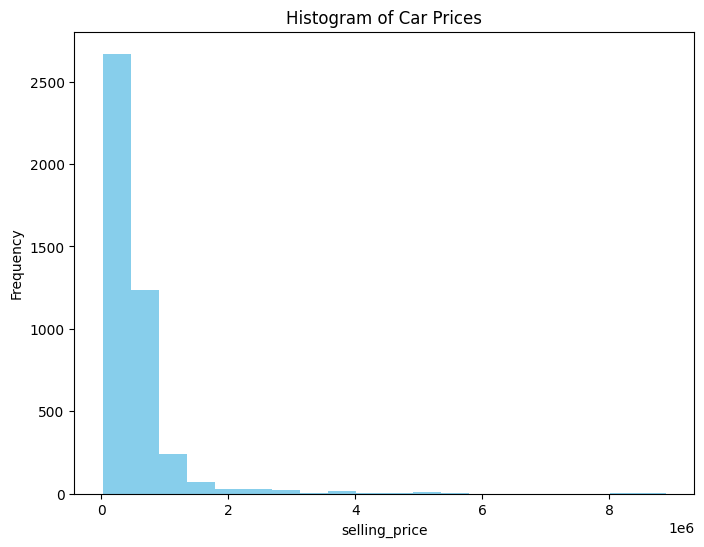

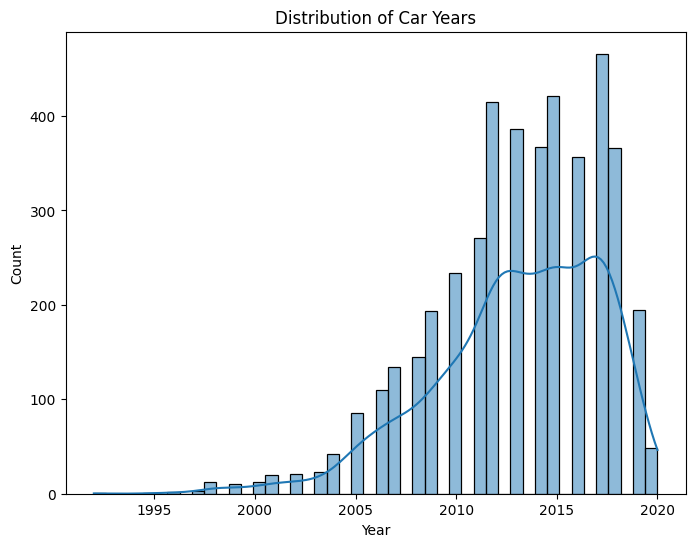

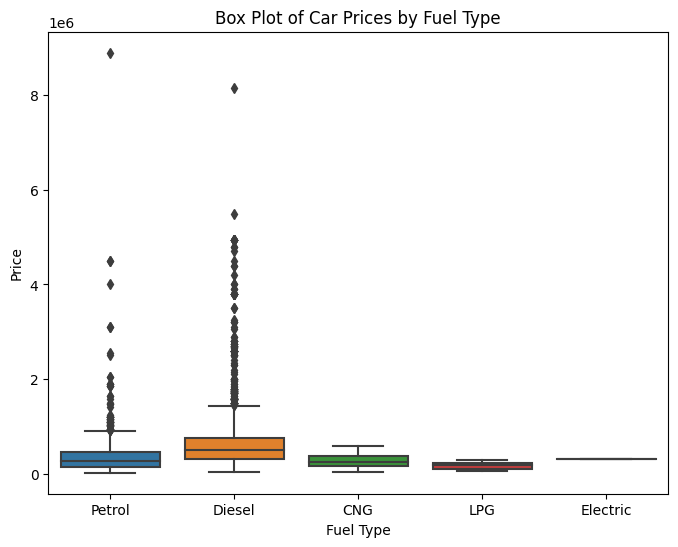

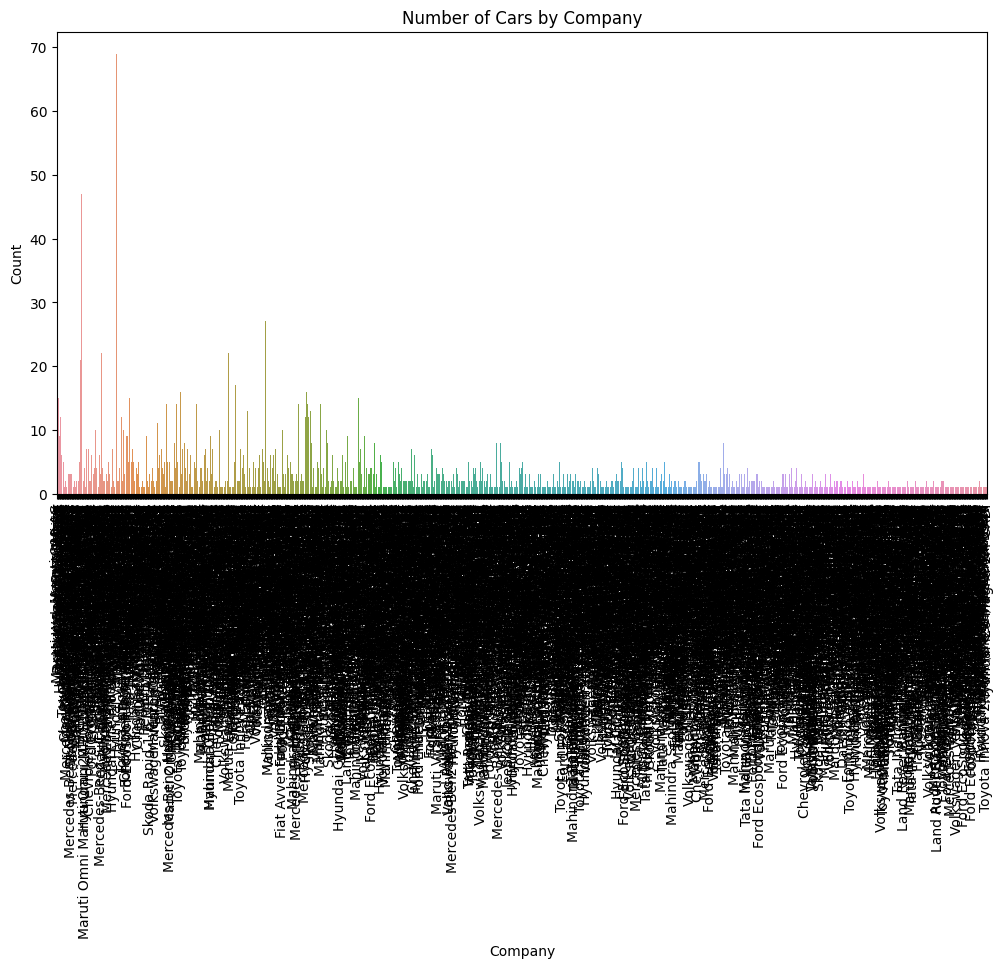

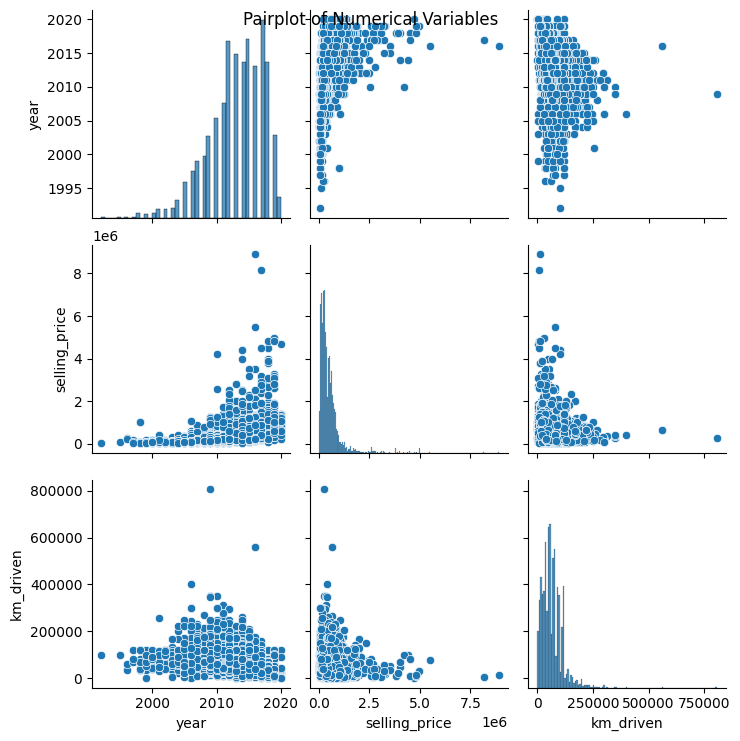

<ipython-input-1-5a3e23cd4b35>:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


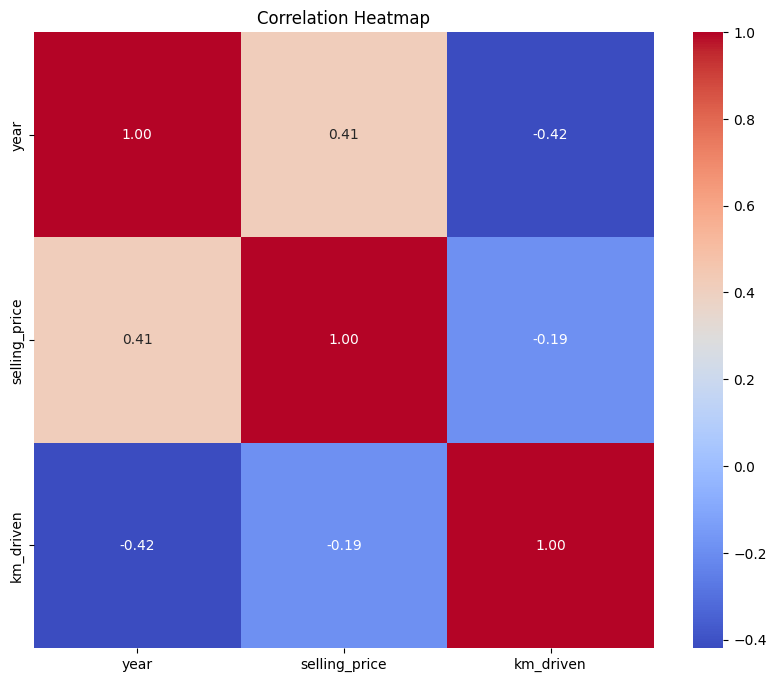

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the dataset from the CSV file into a pandas DataFrame
csv_file = "CAR DETAILS.csv"
df = pd.read_csv(csv_file)

# Step 2: Data Exploration - Basic statistics and information about the dataset
print("Data Exploration:")
print(df.head())  # Display the first few rows of the dataset
print("\nData Information:")
print(df.info())  # Display information about the dataset, including data types and missing values

# Step 3: Exploratory Data Analysis (EDA) - Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Step 4: Graphical Analysis
# Example 1: Histogram of car prices
plt.figure(figsize=(8, 6))
plt.hist(df["selling_price"], bins=20, color="skyblue")
plt.xlabel("selling_price")
plt.ylabel("Frequency")
plt.title("Histogram of Car Prices")
plt.show()

# Example 2: Histogram of the Year column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='year', kde=True)
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Example 3: Box plot of car prices by fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x="fuel", y="selling_price", data=df)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Box Plot of Car Prices by Fuel Type")
plt.show()

# Example 4: Barplot of Car Companies
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='name')
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Example 5: Pairplot of numerical variables
numerical_cols = ['name','year','selling_price','km_driven','fuel','seller_type','transmission','owner']
sns.pairplot(data=df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

# Example 6: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Conclusions from Graphical Analysis
# Include conclusions here based on the graphs generated above.

# For example, based on the histogram of car prices, we can observe the distribution of prices and
# identify any potential outliers.

# The box plot of car prices by fuel type helps us understand the price distribution based on different
# fuel types, and we can observe any significant differences between them.

# The correlation heatmap provides insights into the relationships between numeric variables. Strong
# positive or negative correlations between variables suggest potential dependencies.

# Continue to add conclusions based on other insights you gain from the graphs.

## Apply various Machine Learning techniques such as Regression or classification ,Bagging, Ensemble techniques and find out the best model using various Machine Learning model evaluation metrics.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression
# Since the Iris dataset is a classification problem, let's use a logistic regression model
reg_model = LogisticRegression(max_iter=1000)
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)

# Classification
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Bagging
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Ensemble
ensemble_model = VotingClassifier(estimators=[('dt', dt_model), ('rf', rf_model)], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Model evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate the models
models = {
    "Logistic Regression": y_pred_reg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Bagging": y_pred_bagging,
    "Ensemble": y_pred_ensemble
}

results = {}
for model_name, y_pred in models.items():
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print the results
print("\nModel Evaluation Metrics:")
print(pd.DataFrame(results).T)


Model Evaluation Metrics:
                     Accuracy  Precision  Recall  F1 Score
Logistic Regression       1.0        1.0     1.0       1.0
Decision Tree             1.0        1.0     1.0       1.0
Random Forest             1.0        1.0     1.0       1.0
Bagging                   1.0        1.0     1.0       1.0
Ensemble                  1.0        1.0     1.0       1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Save the best model and Load the model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump, load

# Load the Iris dataset
dataset = pd.read_csv('CAR DETAILS.csv')

# Split the dataset into features (X) and target (y)
X = dataset.drop('selling_price', axis=1)
y = dataset['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (code for model training and evaluation from the previous example)

# Find the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]["Accuracy"])
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, "best_model.joblib")

# Load the model for future use
loaded_model = joblib.load("best_model.joblib")

# Example of using the loaded model
X_new_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.2, 2.9, 4.3, 1.3]])
predictions = loaded_model.predict(X_new_data)
print("Predictions using loaded model:", predictions)

ValueError: ignored

## Take the original data set and make another dataset by randomly picking 20 data points from the CAR DETAILS dataset and apply the saved model on the same Dataset and test the model

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Load the original dataset (Replace 'car_data.csv' with your actual dataset file path)
# car_data = pd.read_csv('car_data.csv')

# For demonstration purposes, let's create a simple example dataset
data = {
    'Price': [3000, 2500, 5000, 6000, 3500, 7000, 8000, 9000, 2000, 10000, 4500, 4200, 3800, 5200, 4700, 6500, 7200, 8800, 7700, 5300],
    'Year': [2010, 2011, 2009, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2015, 2016, 2017, 2018, 2019, 2020],
    'Kilometers_Driven': [50000, 60000, 70000, 55000, 45000, 30000, 25000, 20000, 80000, 90000, 35000, 40000, 42000, 32000, 28000, 23000, 22000, 18000, 21000, 26000],
    # Add more features as needed
    # ...
}

car_data = pd.read_csv('CAR DETAILS.csv')

# Load the saved model
loaded_model = joblib.load("best_model.joblib")

# Randomly select 20 data points from the original dataset
random_indices = np.random.choice(len(car_data), size=20, replace=False)
sample_data = car_data.iloc[random_indices]

# Prepare the input features for the model
X_sample = sample_data.drop(columns=['selling_price'])  # Assuming 'Price' is the target variable

# Apply the saved model to the sample data
predictions = loaded_model.Predict(X_sample)

# Print the original data and the model predictions for comparison
print("Original Data:")
print(sample_data)

# Assuming the target variable is 'Price' in the original dataset
original_prices = sample_data['selling_price'].values
print("Original Prices:")
print(original_prices)

print("Model Predictions:")
print(predictions)

AttributeError: ignored